###SALES PREDICTION USING PYTHON###

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [6]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

'/content'

In [10]:
from google.colab import files
files = files.upload()

Saving Advertising.csv to Advertising.csv


In [11]:
df = pd.read_csv('/Advertising.csv')

In [12]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
# To rename the column 'Unnamed: 0' to 'Index'
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [17]:
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
df.tail()

,Index,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [20]:
df.shape

(200, 5)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [22]:
# Check for missing values in the dataset

df.isnull().values.any()

False

In [23]:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [25]:
df.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Data Visualisation

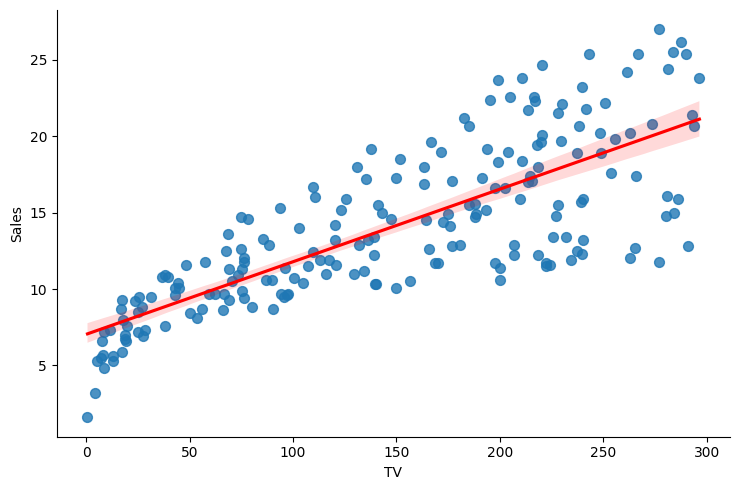

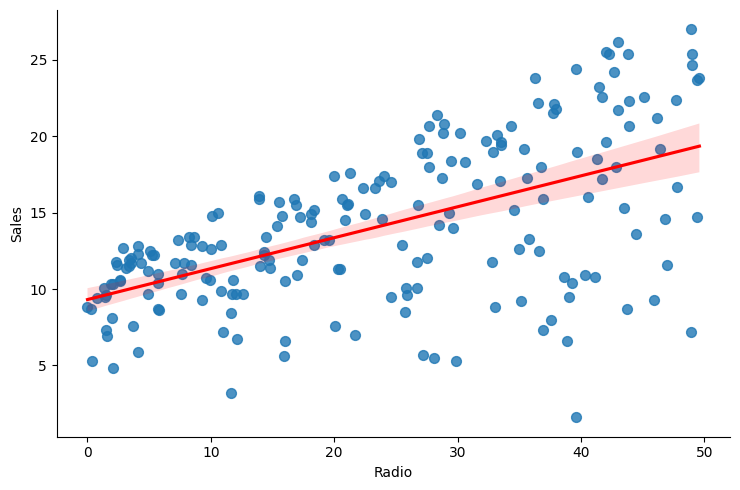

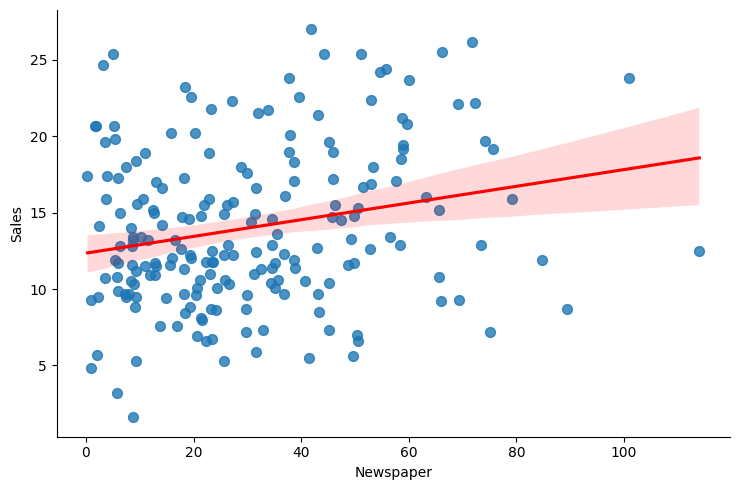

In [26]:
# Create a scatter plot with regression line for each pair of variables
sns.lmplot(x="TV", y="Sales", data=df, aspect=1.5, scatter_kws={"s": 50}, line_kws={"color": "red"})
sns.lmplot(x="Radio", y="Sales", data=df, aspect=1.5, scatter_kws={"s": 50}, line_kws={"color": "red"})
sns.lmplot(x="Newspaper", y="Sales", data=df, aspect=1.5, scatter_kws={"s": 50}, line_kws={"color": "red"})

# Adjust the plots layout
plt.tight_layout()
plt.show()

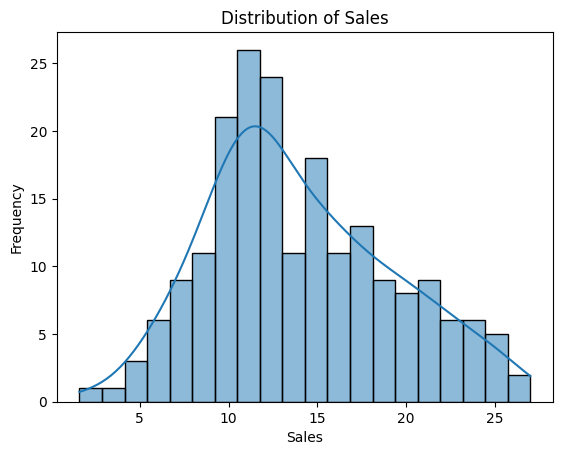

In [27]:
# Create a histogram to check the normality assumption of the dependent variable (Sales)
sns.histplot(df['Sales'], bins=20, kde=True)

plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.show()

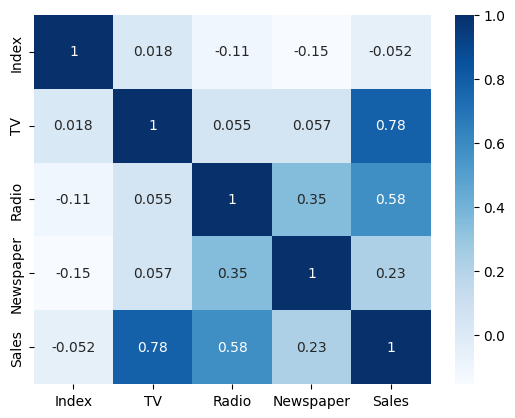

In [30]:
cor=df.corr()
sns.heatmap(cor,annot=True,cmap="Blues")
plt.show()

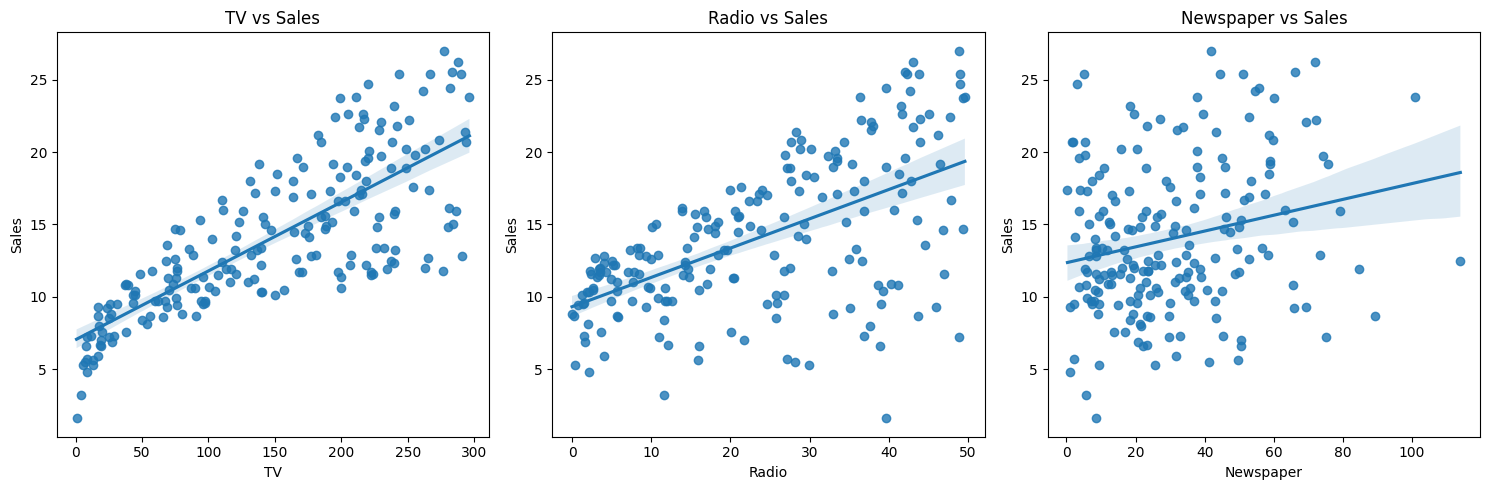

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

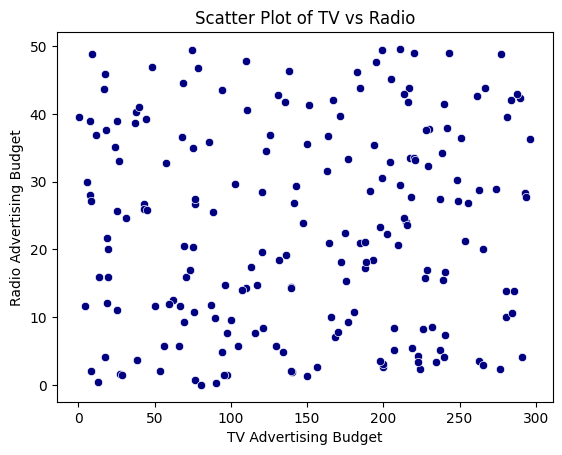

In [32]:
# Create a scatter plot to visualize the relationship between TV and Radio
sns.scatterplot(data=df, x="TV", y="Radio", color="navy")

plt.title('Scatter Plot of TV vs Radio')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Radio Advertising Budget')

plt.show()

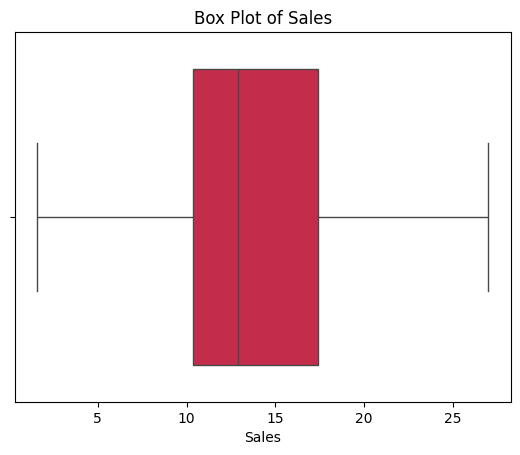

In [33]:
sns.boxplot(data=df, x="Sales", color="crimson")

plt.title('Box Plot of Sales')
plt.xlabel('Sales')

plt.show()

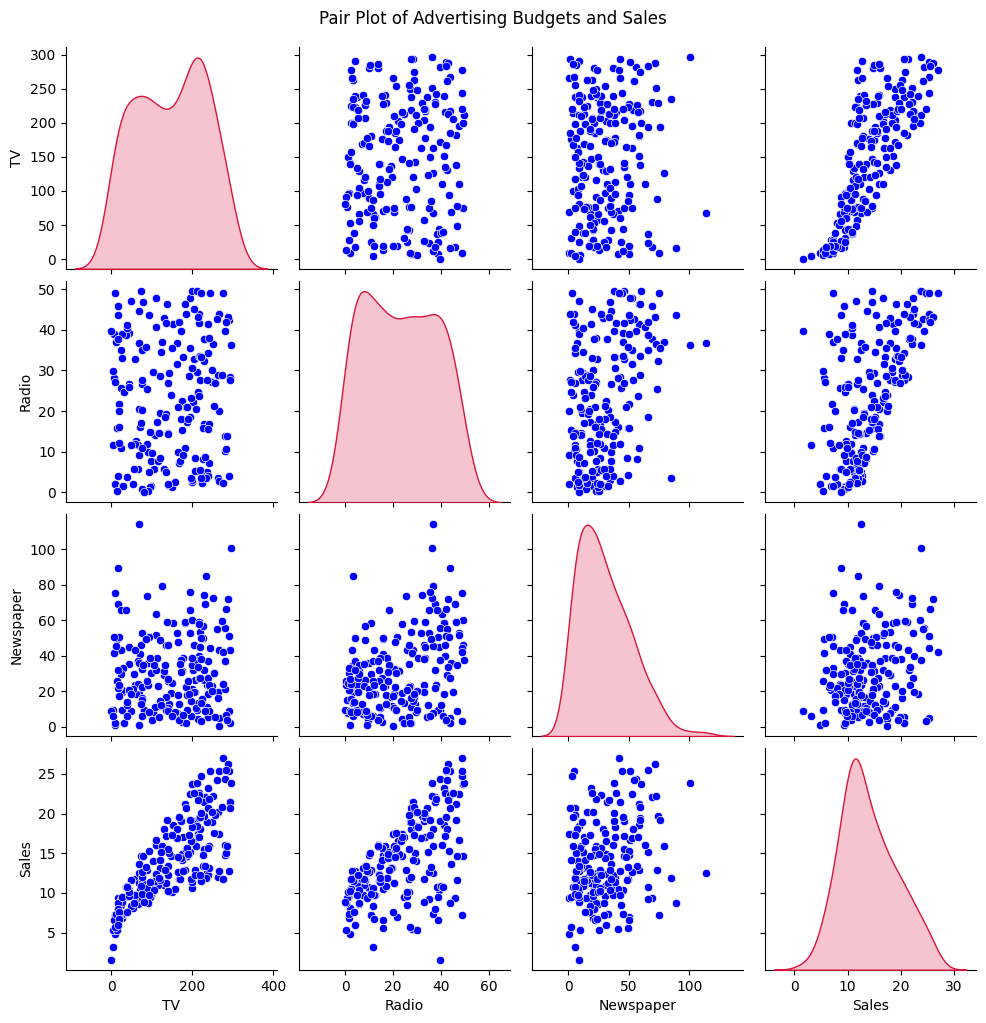

In [34]:
sns.pairplot(df, vars=["TV", "Radio", "Newspaper", "Sales"], kind="scatter", diag_kind="kde", plot_kws={"color": "blue"}, diag_kws={"color": "crimson"})

plt.suptitle('Pair Plot of Advertising Budgets and Sales', y=1.02)

plt.show()

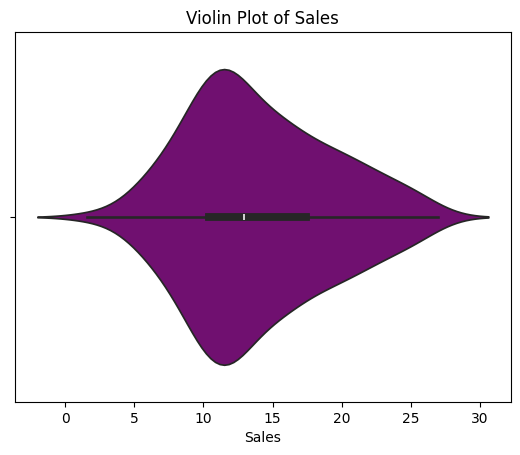

In [35]:
sns.violinplot(data=df, x="Sales", color="purple")

plt.title('Violin Plot of Sales')
plt.xlabel('Sales')

plt.show()

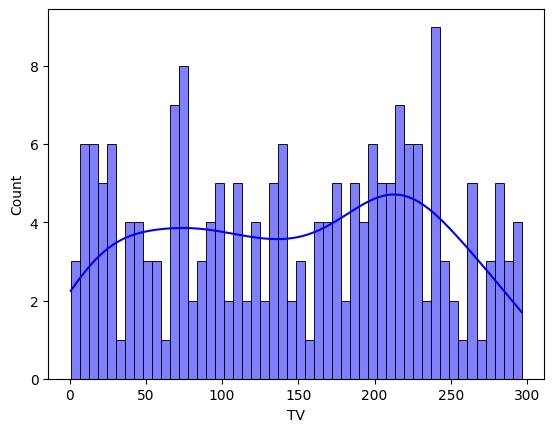

In [39]:
sns.histplot(data=df, x="TV",kde=True,bins=50,color="blue")
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col=["TV","Radio","Newspaper"]
df[col]=scaler.fit_transform(df[col])

In [43]:
# Model Preparation

X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [44]:
X_train

,Index,TV,Radio,Newspaper
114,115,-0.803865,1.589235,0.181642
187,188,0.514454,0.367058,-0.568677
76,77,-1.395883,-1.462830,-0.453597
122,123,0.898623,-1.408812,-0.688360
142,143,0.857754,0.670914,0.338150
...,...,...,...,...
132,133,-1.618912,0.265773,-1.309789
33,34,1.384381,-0.220397,-1.392646
109,110,1.265277,0.245516,-1.153281
139,140,0.442057,1.393416,-1.328202


In [45]:
X_test

,Index,TV,Radio,Newspaper
112,113,0.334630,-0.531005,-1.295980
165,166,1.021231,-1.341288,2.497042
12,13,-1.439088,0.799209,1.627040
73,74,-0.206009,-1.185984,0.034340
144,145,-0.593682,-0.571519,0.384182
20,21,0.833233,0.299535,1.051643
199,200,0.993206,-0.990165,-1.005979
8,9,-1.616576,-1.429069,-1.360424
39,40,0.945331,0.974770,0.066562
88,89,-0.685929,0.150983,1.972279


In [46]:
y_train

,Sales
114,14.6
187,17.3
76,6.9
122,11.6
142,20.1
...,...
132,5.7
33,17.4
109,19.8
139,20.7


In [47]:
y_test

,Sales
112,14.1
165,11.9
12,9.2
73,11.0
144,11.4
20,18.0
199,13.4
8,4.8
39,21.5
88,12.9


In [55]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

print("Coefficients:", lin_model.coef_)
print("Intercept:", lin_model.intercept_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [[8.78763220e-04 4.07367931e+00 2.67941830e+00 1.45568069e-01]]
Intercept: [14.01556495]
Mean Squared Error: 2.6547840473395374
R-squared: 0.8573373416309359


In [57]:
y_pred = lin_model.predict(X_test)

print("Predicted values:", y_pred)

Predicted values: [[13.86660248]
 [15.09122325]
 [10.5428675 ]
 [10.06862959]
 [10.24910194]
 [18.38400605]
 [15.43781443]
 [ 3.41095411]
 [20.52319628]
 [11.99116678]
 [15.07519697]
 [12.92630305]
 [21.10636349]
 [14.43469198]
 [15.8996561 ]
 [16.97846118]
 [10.34269083]
 [16.72132566]
 [ 9.59818033]
 [12.57345487]
 [16.90193979]
 [10.15264682]
 [ 7.99503187]
 [14.04311643]
 [21.37664716]
 [14.22443723]
 [ 7.21209617]
 [ 7.49320029]
 [15.43555387]
 [13.6627843 ]
 [14.9149455 ]
 [10.26985961]
 [11.98342451]
 [16.45185654]
 [ 6.58910936]
 [ 9.67128977]
 [12.9604131 ]
 [20.46887764]
 [ 9.17441325]
 [11.29277888]
 [ 7.3579929 ]
 [24.71036914]
 [ 9.75763102]
 [18.32631998]
 [16.52218695]
 [12.12893004]
 [12.50686253]
 [16.15112466]
 [ 8.6807562 ]
 [ 7.87257184]
 [12.13836007]
 [12.09033226]
 [14.3868374 ]
 [10.55301258]
 [17.65771481]
 [16.65076191]
 [16.50157783]
 [ 3.57015396]
 [23.18326525]
 [13.23306062]]


In [62]:
results = []
names = []

# Loop through each model, fit it to the data, and calculate the RMSE
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.629351


In [65]:
# Make predictions on new data
new_data = pd.DataFrame({'Index': [0], 'TV': [200], 'Radio': [60], 'Newspaper': [25]})
for name, model in models:
    predicted_sales = model.predict(new_data)
    print(f"Predicted Sales using {name}: {predicted_sales}")

Predicted Sales using LinearRegression: [[993.15572586]]


In [66]:
# Make predictions on new data
new_data = pd.DataFrame({'Index': [1], 'TV': [50], 'Radio': [80], 'Newspaper': [35]})
for name, model in models:
    predicted_sales = model.predict(new_data)
    print(f"Predicted Sales using {name}: {predicted_sales}")

Predicted Sales using LinearRegression: [[437.14875513]]


Thankyou